# Analysis
 - The temperature scatterplot shows highest temperatures to be just north of the equator on 7/1/19. This makes sense since it is the beginning of summer in the northern hemisphere.
 - City cloudiness looks to have no correlation with latitude. Also, the cloudiness measure doesn't appear to be as well distributed as others. There are bands at a couple different cloudiness values, like 0, 20, 80, 100. Perhaps there is another measure that correlates with cloudiness. More investigation would be needed.
 - Most humidity measurements are over 60%, no matter what latitude. Conversely, a majority of wind speed measurements are in the 

In [1]:
# Import dependencies
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
from config import api_key
import requests
import openweathermapy as owm
import random
import urllib
import csv

In [2]:
# Set base url and units for temperature
url = "http://api.openweathermap.org/data/2.5/weather?"
settings = {"units": "imperial", "appid": api_key}

In [3]:
### DEFINE A FUNCTION THAT TAKES A POSITIVE INTEGER AS INPUT AND OUTPUTS THAT MANY RANDOM LOCATIONS ###

    # Step A: Use random functionality to get a list of randomly chosen coordinates
    # Step B: Use CITIPY functionality to get a list of corresponding nearest locations
    # Step C: Perform check that the list of locations is unique. If not, repeat steps A and B.

def list_of_locations(num):
    
    coordinates = []
    locations = []
        
    # Populate list of coordinates by generating 'num' random coordinate pairs,
    # each up to 3 decimal places
    for i in range(num):
        lat = round(random.uniform(-90,90), 3) # latitude values
        lon = round(random.uniform(-180,180), 3) # longitude values
        coordinates.append((lat, lon)) 
    
    # Populate lists of locations denoted by cities and corresponding country codes
    # which are nearest to the randomly chosen coordinates found above
    for coordinate_pair in coordinates:
        (lat, lon) = coordinate_pair
        city = citipy.nearest_city(lat, lon)
        locations.append(city.city_name + "," + city.country_code)
    
    # Remove any duplicates from the list.
    unique_locations = []
    
    for x in locations: 
        if x not in unique_locations: 
            unique_locations.append(x)
        locations = unique_locations
        
    return locations

In [4]:
### SET VARIABLE VALUE FOR NUMBER OF LOCATIONS AND STORE JSON RESPONSES FROM API ###

# Set the variable for number of locations. Note that filtering out repeats divides this value approximately by 3.
num_locations = 1600

# Define list to store JSON responses from API calls based on locations (i.e., city and country code names)
responses = []

# Run the function to populate the locations
locations = list_of_locations(num_locations)

In [5]:
# Take lists of locations and ping API with them. Store JSON in a new list called responses.
for location in locations:
    try:
        response = owm.get_current(location, **settings)
        responses.append(response)
        city_name = response.get('name')
        city_number = response.get('id')
        print(f"The city of {city_name} has the city number of {city_number}.")
    except urllib.error.HTTPError as error: 
        pass

The city of Schriesheim has the city number of 2836089.
The city of Port Keats has the city number of 2063039.
The city of Punta Arenas has the city number of 3874787.
The city of Normandin has the city number of 6089179.
The city of Salinopolis has the city number of 3389822.
The city of Buta has the city number of 217570.
The city of Atuona has the city number of 4020109.
The city of Barrow has the city number of 4252975.
The city of Busselton has the city number of 2075265.
The city of Ushuaia has the city number of 3833367.
The city of Mchinji has the city number of 926747.
The city of Chapais has the city number of 5919850.
The city of Salym has the city number of 1493162.
The city of Misratah has the city number of 2214846.
The city of Komsomolskiy has the city number of 1486910.
The city of Hobart has the city number of 2163355.
The city of Albany has the city number of 2077963.
The city of Vaini has the city number of 4032243.
The city of Bethel has the city number of 5880568.


The city of Belmonte has the city number of 3448454.
The city of Buraydah has the city number of 107304.
The city of Havre-Saint-Pierre has the city number of 5972291.
The city of Ulaangom has the city number of 1515029.
The city of Penzance has the city number of 2640377.
The city of Walvis Bay has the city number of 3359638.
The city of Beloha has the city number of 1067565.
The city of Clyde River has the city number of 5924351.
The city of Barabash has the city number of 2027142.
The city of Mercedes has the city number of 3430709.
The city of Vestmannaeyjar has the city number of 3412093.
The city of Pareora has the city number of 2181133.
The city of Dhemaji has the city number of 1272783.
The city of Coquimbo has the city number of 3893629.
The city of Mount Isa has the city number of 2065594.
The city of Boca do Acre has the city number of 3664956.
The city of Half Moon Bay has the city number of 5354943.
The city of Saint-Pierre has the city number of 3424934.
The city of Hamb

The city of Mpika has the city number of 905846.
The city of Qianan has the city number of 2035410.
The city of Itarema has the city number of 3393692.
The city of Eirunepe has the city number of 3664321.
The city of Srednekolymsk has the city number of 2121025.
The city of Lazaro Cardenas has the city number of 3996234.
The city of Buchanan has the city number of 2278158.
The city of Vyazma has the city number of 470676.
The city of Nsawam has the city number of 2297141.
The city of Riyadh has the city number of 108410.
The city of Chateau-Gontier has the city number of 3026273.
The city of Fenoarivo Atsinanana has the city number of 1064980.
The city of La Rioja has the city number of 3848950.
The city of Port Hardy has the city number of 6111862.
The city of Horadiz has the city number of 148003.
The city of Mahajanga has the city number of 1062663.
The city of Tomatlan has the city number of 3981391.
The city of Cockburn Town has the city number of 3572627.
The city of Marawi has t

The city of Manokwari has the city number of 1636308.
The city of Lazarev has the city number of 2123836.
The city of Ust-Tsilma has the city number of 477940.
The city of Roros has the city number of 3141332.
The city of Ponta Delgada has the city number of 3372783.
The city of Ipira has the city number of 3467261.
The city of Khorinsk has the city number of 2022304.
The city of Gorontalo has the city number of 1643837.
The city of Rio Grande has the city number of 3451138.
The city of Cockburn Town has the city number of 3576994.
The city of San Carlos del Zulia has the city number of 3628489.
The city of Lagoa has the city number of 2267254.
The city of Mirnyy has the city number of 502265.
The city of Nenjiang has the city number of 2035601.
The city of Chifeng has the city number of 2038067.
The city of Houma has the city number of 4328010.
The city of Grindavik has the city number of 3416888.
The city of Aleysk has the city number of 1511783.
The city of Laishevo has the city num

In [6]:
# Check number of cities in our sample
len(responses)

551

In [7]:
### WRITE CSV BASED ON RESPONSES LIST OF NESTED DICTIONARIES ###

with open('reponses.csv', 'w', newline='') as csv_file:
    csvwriter = csv.writer(csv_file, delimiter=',')
    csvwriter.writerow(['coord_lat', 'coord_lon', 'weather_id', 'weather_main', 'weather_description', 'weather_icon', 'base', 'main_temp', 'main_pressure', 'main_humidity', 'main_temp_min', 'main_temp_max', 'visibility', 'wind_speed', 'wind_deg', 'clouds_all', 'dt', 'sys_type', 'sys_id', 'sys_message', 'sys_country', 'sys_sunrise', 'sys_sunset', 'timezone', 'id', 'name', 'cod'])
    
    for response in responses:
        coord_lat = response['coord'].get('lat')
        coord_lon = response['coord'].get('lon')
       
        weather_id = response['weather'][0].get('id')
        weather_main = response['weather'][0].get('main')
        weather_description = response['weather'][0].get('description')
        weather_icon = response['weather'][0].get('icon')
        
        base = response.get('base')
        
        main_temp = response['main'].get('temp')
        main_pressure = response['main'].get('pressure')
        main_humidity = response['main'].get('humidity')
        main_temp_min = response['main'].get('temp_min')
        main_temp_max = response['main'].get('temp_max')
        
        visibility = response.get('visibility')
        
        wind_speed = response['wind'].get('speed')
        wind_deg = response['wind'].get('deg')
        
        clouds_all = response['clouds'].get('all')
        dt = response.get('dt')
        
        sys_type = response['sys'].get('type')
        sys_id = response['sys'].get('id')
        sys_message = response['sys'].get('message')
        sys_country = response['sys'].get('country')
        sys_sunrise = response['sys'].get('sunrise')
        sys_sunset = response['sys'].get('sunset')
        
        timezone = response.get('timezone')
        __id__ = response.get('id')
        name = response.get('name')
        cod = response.get('cod')
        csvwriter.writerow([coord_lat, coord_lon, weather_id, weather_main, weather_description, weather_icon, base, main_temp, main_pressure, main_humidity, main_temp_min, main_temp_max, visibility, wind_speed, wind_deg, clouds_all, dt, sys_type, sys_id, sys_message, sys_country, sys_sunrise, sys_sunset, timezone, __id__, name, cod])

In [24]:
### CREATE DATAFRAME WITH RELEVANT DATA FROM JSON RESPONSES ###

# Define a summary list of metrics I want to pull from the responses list
summary = ["name", "coord.lat", "main.temp", "main.humidity", "wind.speed", "clouds.all"]

# Create a Pandas DataFrame with the results, indexed by city name since this data will not be called by scatterplots
data_slice = [response(*summary) for response in responses]
data_df = pd.DataFrame(data_slice)
data_df.columns = ['city_name', 'latitude', 'temperature', 'humidity_percentage', 'wind_speed_mph', 'cloudiness_percentage']
data_df = data_df.set_index('city_name')
data_df = data_df[data_df['humidity_percentage'] <= 100] # Include this line because a couple humidity measurements were wacky (close to 300%)
data_df.head()

,latitude,temperature,humidity_percentage,wind_speed_mph,cloudiness_percentage
city_name,,,,,
Schriesheim,49.48,71.35,44,9.17,0
Port Keats,-14.25,65.59,51,11.18,69
Punta Arenas,-53.16,36.00,86,4.70,40
Normandin,48.84,75.20,53,8.05,75
Salinopolis,-0.61,82.33,77,15.28,46


In [30]:
### DEFINE FUNCTION THAT TAKES A COLUMN FROM DATAFRAME AS INPUT AND OUTPUTS A SCATTERPLOT ###

def scatter(column, title, y_axis_label, file_name):
    plt.scatter(data_df['latitude'], data_df[column], c='b', marker='o', zorder=1)
    plt.title(title, size='xx-large', fontweight='bold', pad=20)
    plt.xlabel('Latitude Coordinate', size='large', labelpad=10)
    plt.ylabel(y_axis_label, size='large', labelpad=10)
    plt.savefig(file_name)
    plt.show()

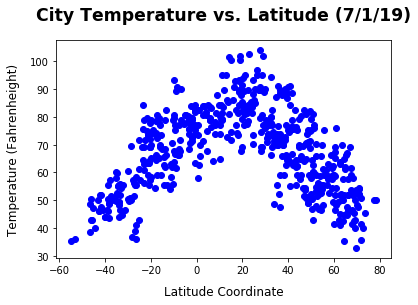

In [31]:
# Build scatterplot that plots temperature (F) vs. latitude
scatter('temperature', 'City Temperature vs. Latitude (7/1/19)', 'Temperature (Fahrenheight)', 'temperature_vs_latitude')

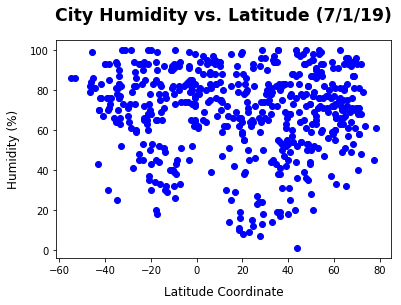

In [32]:
# Build scatterplot that plots humidity vs. latitude
scatter('humidity_percentage', 'City Humidity vs. Latitude (7/1/19)', 'Humidity (%)', 'humidity_vs_latitude')

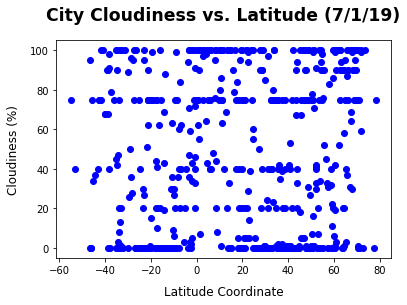

In [33]:
# Build scatterplot that plots cloudiness vs. latitude
scatter('cloudiness_percentage', 'City Cloudiness vs. Latitude (7/1/19)', 'Cloudiness (%)', 'cloudiness_vs_latitude')

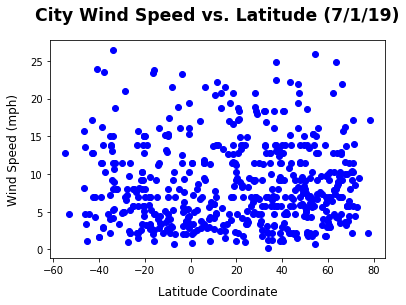

In [34]:
# Build scatterplot that plots cloudiness vs. latitude
scatter('wind_speed_mph', 'City Wind Speed vs. Latitude (7/1/19)', 'Wind Speed (mph)', 'windspeed_vs_latitude')